In [29]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [57]:
s1 = pd.read_csv('서면1.csv')
s1


,year,month,day,hour,PM2.5 (μg/m³),PM2.5 (μg/m³).1,PM10 (μg/m³),PM10 (μg/m³).1
0,2019,1,1,0,14.0,22.0,29.0,30.0
1,2019,1,1,1,13.0,18.0,31.0,31.0
2,2019,1,1,2,13.0,24.0,29.0,23.0
3,2019,1,1,3,18.0,18.0,25.0,19.0
4,2019,1,1,4,18.0,15.0,27.0,25.0
...,...,...,...,...,...,...,...,...
52579,2014,12,31,19,19.0,29.0,53.0,47.0
52580,2014,12,31,20,13.0,23.0,39.0,40.0
52581,2014,12,31,21,19.0,33.0,53.0,50.0
52582,2014,12,31,22,24.0,32.0,61.0,49.0


In [58]:
# s1 =s1.fillna(0)
s1=s1.dropna(axis=0)

In [59]:
# df = df.drop(df[df.score < 50].index)

s1 = s1.drop(s1[s1['PM2.5 (μg/m³)']>200].index)

In [60]:
s1 = s1.drop(s1[s1['PM2.5 (μg/m³).1']>200].index)

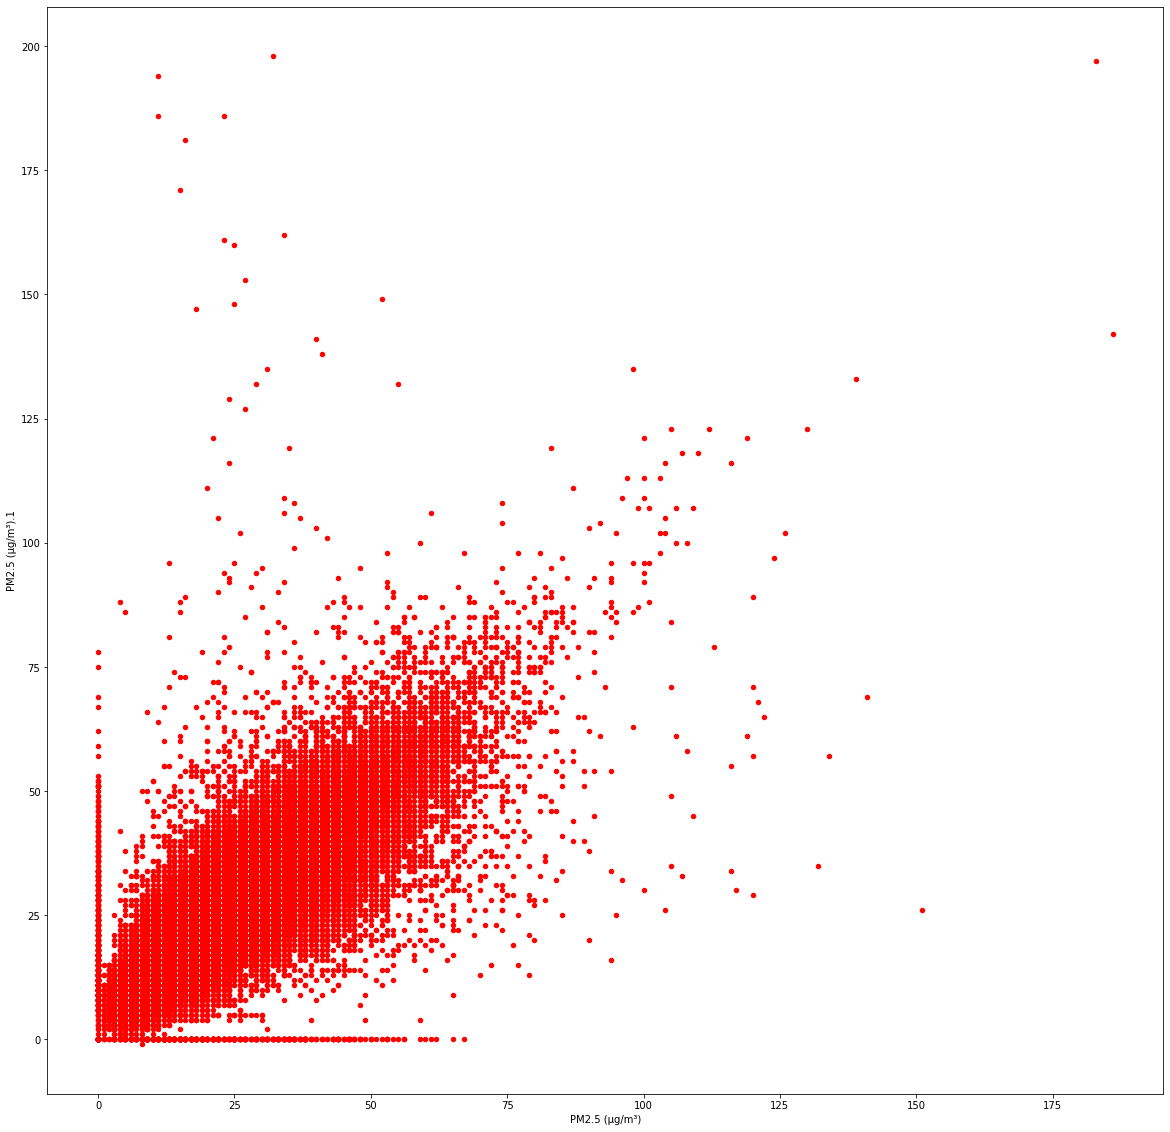

In [61]:
plt.rcParams["figure.figsize"] = (20,20)

ax = s1.plot(kind="scatter", x='PM2.5 (μg/m³)', y='PM2.5 (μg/m³).1',color="red")
# ax.set_ylim(0,150)
# ax.set_xlim(0,150)


In [62]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(s1['PM2.5 (μg/m³)']), y= s1['PM2.5 (μg/m³).1'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['PM2.5 (μg/m³)']))
print("a value: ", linear_regression.intercept_)
print("b value: ", linear_regression.coef_)

a value:  7.939596089770809
b value:  [0.76226471]


In [63]:
residuals = s1['PM2.5 (μg/m³).1'] - prediction
residuals.describe()

count    5.050300e+04
mean    -2.019031e-14
std      9.274970e+00
min     -9.704157e+01
25%     -4.943376e+00
50%     -4.226256e-01
75%      4.479257e+00
max      1.776755e+02
Name: PM2.5 (μg/m³).1, dtype: float64

In [64]:
#잔차 제곱 합
SSE = (residuals**2).sum()
SST = ((s1['PM2.5 (μg/m³).1']-s1['PM2.5 (μg/m³).1'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print("R_squared: ", R_squared)

R_squared:  0.5949933731895056


(0, 200)

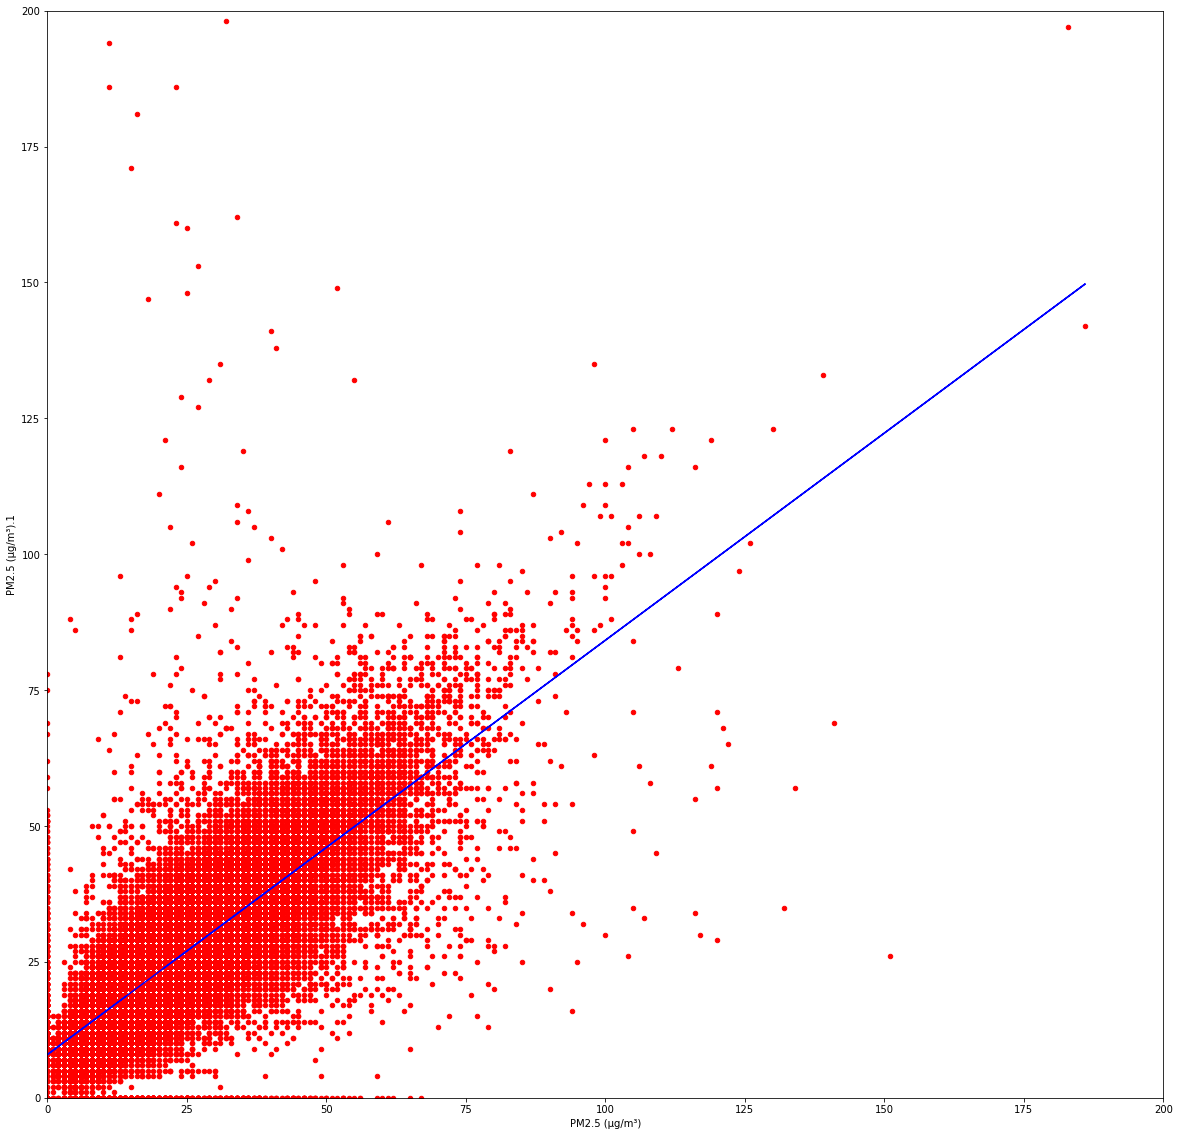

In [65]:
ax = s1.plot(kind="scatter", x='PM2.5 (μg/m³)', y='PM2.5 (μg/m³).1',color="red")
plt.plot(s1['PM2.5 (μg/m³)'], prediction, color= 'blue')
ax.set_ylim(0,200)
ax.set_xlim(0,200)

# pm10

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

ax = s1.plot(kind="scatter", x='PM10 (μg/m³)', y='PM10 (μg/m³).1',color="red")
ax.set_ylim(0,150)
ax.set_xlim(0,150)


In [ ]:
residuals = s1['PM10 (μg/m³).1'] - prediction
residuals.describe()

SSE = (residuals**2).sum()
SST = ((s1['PM10 (μg/m³).1']-s1['PM10 (μg/m³).1'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print("R_squared: ", R_squared)

In [ ]:
ax = s1.plot(kind="scatter", x='PM10 (μg/m³)', y='PM10 (μg/m³).1',color="red")
plt.plot(s1['PM10 (μg/m³)'], prediction, color= 'blue')
ax.set_ylim(0,200)
ax.set_xlim(0,200)

